Top 5 Entries of StackOverflow Post Table

In [3]:
import pandas as pd
df = pd.read_csv('QueryResults.csv', names=['Date', 'Tag', 'Posts'])
clean_df = df.dropna()
dates = pd.to_datetime(clean_df['Date'])
clean_df['Date'] = dates
clean_df = clean_df.sort_values('Posts', ascending=False)
clean_df.head()

<ipython-input-3-0c9d8197abe4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Date'] = dates


,Date,Tag,Posts
1960,2020-05-01,python,29367.0
1946,2020-04-01,python,27556.0
1974,2020-06-01,python,27044.0
1988,2020-07-01,python,26229.0
1257,2016-03-01,javascript,24068.0


Bottom 5 Entries of StackOverflow Post Table

In [4]:
clean_df.tail()

,Date,Tag,Posts
283,2010-05-01,swift,1.0
451,2011-05-01,swift,1.0
311,2010-07-01,swift,1.0
58,2008-12-01,r,1.0
46,2008-11-01,r,1.0


In [13]:
clean_df.shape

(2635, 3)

Sum of All Posts Per Language

In [5]:
lang_data = clean_df.groupby('Tag').sum('Posts')
num_lang_posts = lang_data['Posts']
num_lang_posts = num_lang_posts.sort_values(ascending=False)
num_lang_posts

Tag
javascript    2529228.0
python        2196882.0
java          1917677.0
c#            1617163.0
php           1465271.0
c++            808068.0
r              506768.0
c              404698.0
swift          333855.0
ruby           229082.0
go              73132.0
perl            68129.0
delphi          51992.0
assembly        44500.0
Name: Posts, dtype: float64

Plotting Popularity Between Java and Python From Number of StackOverflow Posts

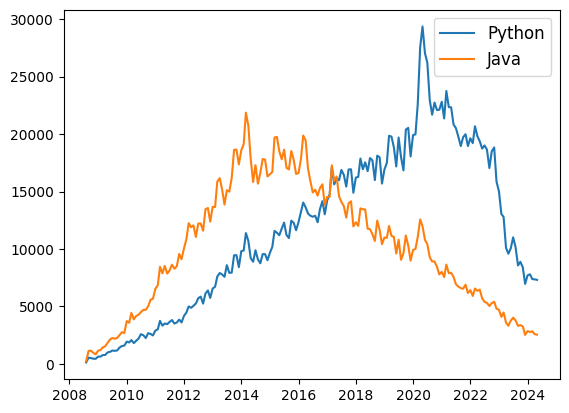

In [8]:
from matplotlib.pyplot import plot, legend, figure
new_data = clean_df.pivot(index='Date', columns='Tag', values='Posts')
plot(new_data['python'], label=new_data['python'].name.title())
plot(new_data['java'], label=new_data['java'].name.title())
legend(fontsize=12)

Polished Plot Between Python and Java

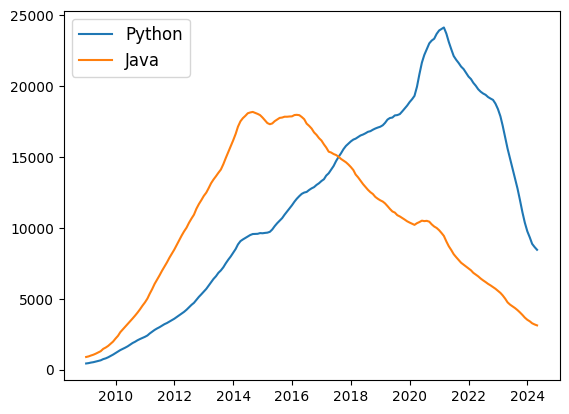

In [9]:
plot(new_data['python'].rolling(12, min_periods=6).mean(), label=new_data['python'].name.title())
plot(new_data['java'].rolling(12, min_periods=6).mean(), label=new_data['java'].name.title())

legend(fontsize=12)

Showing 5 Oldest StackOverflow Post Data Frames With Empty Values Filled With 0

In [10]:
new_data = new_data.fillna(0)
new_data.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,503.0,164.0,13.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1128.0,634.0,130.0,474.0,536.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,806.0,112.0,0.0,1148.0,722.0,128.0,604.0,506.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,497.0,448.0,1.0,157.0,0.0


Showing 5 Newest StackOverflow Post Data Frames

In [11]:
new_data.tail()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2024-01-01,176.0,818.0,2672.0,1573.0,88.0,340.0,2854.0,5087.0,33.0,1384.0,7702.0,1800.0,162.0,861.0
2024-02-01,132.0,764.0,2690.0,1436.0,110.0,305.0,2770.0,4727.0,36.0,1297.0,7793.0,1823.0,157.0,667.0
2024-03-01,139.0,738.0,2593.0,1344.0,98.0,328.0,2829.0,4728.0,47.0,1367.0,7383.0,1691.0,139.0,724.0
2024-04-01,186.0,743.0,2737.0,1314.0,106.0,304.0,2580.0,4263.0,27.0,1180.0,7354.0,1539.0,116.0,691.0
2024-05-01,189.0,688.0,2580.0,1571.0,106.0,284.0,2541.0,4234.0,42.0,1250.0,7311.0,1415.0,122.0,678.0


Shape of Pivoted Table

In [12]:
new_data.shape

(191, 14)

Checking If Empty Values Exist in the Table

In [14]:
new_data.isna().values.any()

False

Plotting Number of Posts By Programming Language on StackOverflow

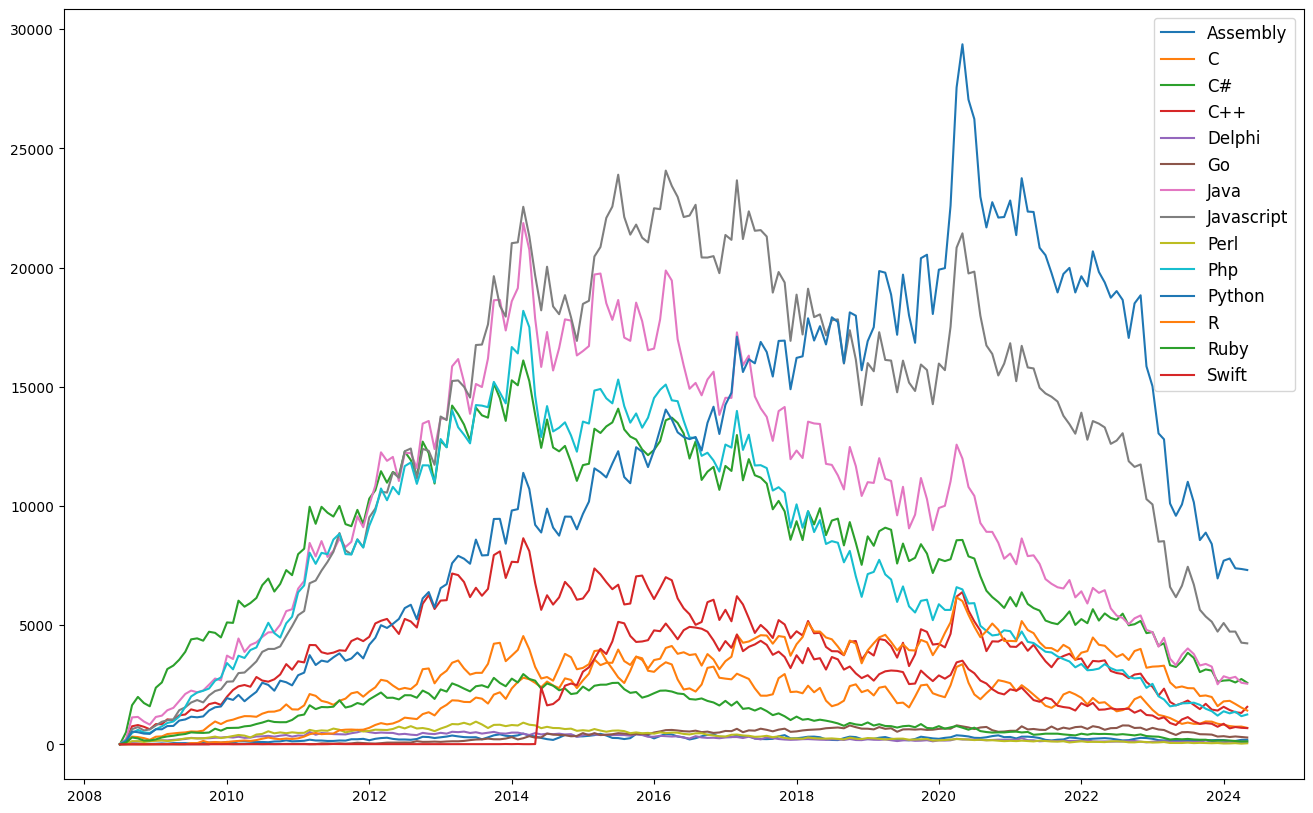

In [15]:
from matplotlib.pyplot import plot, legend, figure

figure(figsize=(16, 10))
for column in new_data:
  plot(new_data.index, new_data[column], label=new_data[column].name.title())

legend(fontsize=12)